In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
experiments = pd.read_csv("../results/experiments.csv")
#experiments = pd.read_csv("../experiments.csv")


In [4]:
experiments.tail(50)

,RUN,modelname,data,num_units,num_blocks,epochs,batch_size,learningrate,optimizer,dropout,...,AE_1,AE_2,AE_3,AE_4,AE_5,TC_t_1,TC_t_2,TC_t_3,TC_t_4,TC_t_5
110,110,LSTM,traffic_fines,100,1,200,128,0.10,NADAM,0.2,...,221.740144,209.784954,208.379549,194.213671,193.806876,0.0,0.738242,2.405778,0.755569,2.657134
111,111,LSTM,traffic_fines,100,1,200,128,0.10,NADAM,0.2,...,217.036711,214.333224,214.382210,205.580766,193.436207,0.0,0.510891,7.578096,2.489714,3.710889
112,112,LSTM,traffic_fines,100,1,200,128,0.10,NADAM,0.2,...,219.440138,212.177379,214.473103,195.898474,195.082775,0.0,0.347656,2.263805,1.106215,2.336562
113,113,LSTM,traffic_fines,100,1,200,128,0.10,NADAM,0.2,...,222.606234,212.405461,223.299835,196.761591,193.324375,0.0,0.565051,0.963242,4.257145,2.668331
114,114,LSTM,traffic_fines,100,1,200,128,0.10,NADAM,0.2,...,233.697045,223.681589,224.609767,202.247594,193.473989,0.0,0.006011,0.594203,0.370486,2.485133
115,115,LSTM,traffic_fines,100,1,200,128,0.10,NADAM,0.2,...,222.200997,209.762236,214.825695,190.110833,192.941455,0.0,0.162088,3.517127,2.653302,2.873930
116,116,LSTM,traffic_fines,100,1,200,128,0.10,NADAM,0.2,...,226.437500,213.922491,217.438133,192.424528,193.300377,0.0,2.215417,4.486605,3.375035,2.012214
117,117,LSTM,traffic_fines,100,1,200,128,0.10,NADAM,0.2,...,220.375795,209.534917,218.409409,192.011932,196.127075,0.0,0.336051,2.077313,7.715241,2.552437
118,118,LSTM,traffic_fines,100,1,200,128,0.10,NADAM,0.2,...,220.064034,213.060617,221.481352,193.304146,197.439796,0.0,0.136471,0.996776,4.908041,2.336371
119,119,LSTM,traffic_fines,100,1,200,128,0.10,NADAM,0.2,...,223.168916,207.810095,214.255320,196.091766,193.659226,0.0,2.715529,0.933423,1.254886,1.768266


In [5]:
experiments["MAE"]

0      12.351460
1      12.447580
2      12.426380
3      12.324597
4      12.443495
         ...    
155    45.678051
156    46.485465
157    46.237643
158    46.033954
159    46.818598
Name: MAE, Length: 160, dtype: float64

In [15]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    
    ci = np.round(h,2)
    mean = np.round(m,2)
    string = str(mean)+ " ! " +str(ci)
    return string

#filter unwanted experiments
subset = experiments#.loc[experiments.loss_function != "MSE"]

#crosstab
df = pd.pivot_table(subset, 
                    index='loss_function', 
                    columns="data", 
                    values="MAE",
                    aggfunc=mean_confidence_interval)

# change order
df = df[['sepsis', 'helpdesk', 'traffic_fines', 'hospital_billing']]

# sort the table
sorter = ['MAE', 'MAE_Mtd', 'MAE_Ptd', 'MAE_Etd']
df.sort_values(by="loss_function", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)


string = str((df.to_latex(index=True)))
string = string.replace('!', '$\pm$')

string = string.replace("toprule","hline")
string = string.replace("midrule","hline")
string = string.replace("bottomrule","hline") #

string = string.replace("MAE           &","$MAE$           &")
string = string.replace("MAE\_Etd","$MAE_{EtD}$")
string = string.replace("MAE\_Mtd","$MAE_{MtD}$")
string = string.replace("MAE\_Ptd","$MAE_{PtD}$")

string = string.replace("lllll","|l|l|l|l|l|")

string = string.replace("data","Loss function")

string = string.replace("loss\_function &             &              &               &                  \\","")

string = string.replace('sepsis', 'Sepsis')
string = string.replace('helpdesk', 'Helpdesk')
string = string.replace('traffic\_fines', 'Traffic fines')
string = string.replace('hospital\_billing', 'Hospital billing')

print(string)
df

\begin{tabular}{|l|l|l|l|l|}
\hline
Loss function &        Sepsis &     Helpdesk &  Traffic fines & Hospital billing \\
loss\_function &               &              &                &                  \\
\hline
$MAE$           &  12.39 $\pm$ 0.11 &  8.99 $\pm$ 0.33 &  214.13 $\pm$ 3.55 &     46.55 $\pm$ 0.61 \\
$MAE_{MtD}$       &  12.34 $\pm$ 0.08 &  8.59 $\pm$ 0.29 &  209.99 $\pm$ 3.35 &     46.24 $\pm$ 0.46 \\
$MAE_{PtD}$       &  12.45 $\pm$ 0.12 &  8.81 $\pm$ 0.53 &  210.21 $\pm$ 2.52 &     46.39 $\pm$ 0.55 \\
$MAE_{EtD}$       &  12.33 $\pm$ 0.05 &  8.63 $\pm$ 0.34 &  208.91 $\pm$ 1.77 &     46.34 $\pm$ 0.57 \\
\hline
\end{tabular}



C:\Users\Mike\AppData\Local\Temp\ipykernel_29948\1110697040.py:33: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = str((df.to_latex(index=True)))


data,sepsis,helpdesk,traffic_fines,hospital_billing
loss_function,,,,
MAE,12.39 ! 0.11,8.99 ! 0.33,214.13 ! 3.55,46.55 ! 0.61
MAE_Mtd,12.34 ! 0.08,8.59 ! 0.29,209.99 ! 3.35,46.24 ! 0.46
MAE_Ptd,12.45 ! 0.12,8.81 ! 0.53,210.21 ! 2.52,46.39 ! 0.55
MAE_Etd,12.33 ! 0.05,8.63 ! 0.34,208.91 ! 1.77,46.34 ! 0.57


In [7]:
print(string)

\begin{tabular}{|l|l|l|l|l|}
\hline
Loss function &        Sepsis &     Helpdesk &  Traffic fines & Hospital billing \\
loss\_function &               &              &                &                  \\
\hline
$MAE$           &  12.39 $\pm$ 0.11 &  8.99 $\pm$ 0.33 &  214.13 $\pm$ 3.55 &     46.55 $\pm$ 0.61 \\
$MAE_{MtD}$       &  12.34 $\pm$ 0.08 &  8.59 $\pm$ 0.29 &  209.99 $\pm$ 3.35 &     46.24 $\pm$ 0.46 \\
$MAE_{PtD}$       &  12.45 $\pm$ 0.12 &  8.81 $\pm$ 0.53 &  210.21 $\pm$ 2.52 &     46.39 $\pm$ 0.55 \\
$MAE_{EtD}$       &  12.33 $\pm$ 0.05 &  8.63 $\pm$ 0.34 &  208.91 $\pm$ 1.77 &     46.34 $\pm$ 0.57 \\
\hline
\end{tabular}



In [14]:
#subset.loc[subset.data == "hospital_billing"].MAE.hist(bins=20)

In [27]:
def f_test(group1, group2, log_trans=False):
    
    #log transform
    if log_trans == True:
        group1 = np.log(1+group1)
        group2 = np.log(1+group2)
    
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value
  

In [57]:
datasets = ['sepsis', 'helpdesk', 'traffic_fines', 'hospital_billing']
loss_functions = ['MAE_Mtd', 'MAE_Ptd', 'MAE_Etd']

res = {"event_log":[],
      "loss_function":[],
      "f_value":[],
      "p_value":[]}

#do a comparison for each dataset
for dataset in datasets:
    results = experiments.loc[experiments.data == dataset]
    
    #do a comparison with MAE for each of the three losses
    for loss in loss_functions:
        
        #get MAE vectors, n = 10
        baseline = results.loc[results.loss_function == "MAE","MAE"]
        loss_i = results.loc[results.loss_function == loss,"MAE"]
        
        #perform f_test:
        f_value, p_value = f_test(baseline.values, loss_i.values, log_trans=False)
        
        #append results
        res["event_log"].append(dataset)
        res["loss_function"].append(loss)
        res["f_value"].append(np.round(f_value,decimals=3))
        res["p_value"].append(np.round(p_value,decimals=3))
res = pd.DataFrame(res)

In [58]:
res

,event_log,loss_function,f_value,p_value
0,sepsis,MAE_Mtd,1.642,0.236
1,sepsis,MAE_Ptd,0.750,0.662
2,sepsis,MAE_Etd,3.938,0.027
3,helpdesk,MAE_Mtd,1.305,0.349
4,helpdesk,MAE_Ptd,0.383,0.916
5,helpdesk,MAE_Etd,0.903,0.559
6,traffic_fines,MAE_Mtd,1.118,0.436
7,traffic_fines,MAE_Ptd,1.979,0.162
8,traffic_fines,MAE_Etd,4.027,0.025
9,hospital_billing,MAE_Mtd,1.745,0.210


In [59]:
string = str((res.to_latex(index=False)))
#string = string.replace('!', '$\pm$')

string = string.replace("toprule","hline")
string = string.replace("midrule","hline")
string = string.replace("bottomrule","hline") #

string = string.replace("MAE           &","$MAE$           &")
string = string.replace("MAE\_Etd","$MAE_{EtD}$")
string = string.replace("MAE\_Mtd","$MAE_{MtD}$")
string = string.replace("MAE\_Ptd","$MAE_{PtD}$")

string = string.replace("llrr","|l|l|r|r|")

string = string.replace("loss\_function","Loss function")
string = string.replace("       event\_log","Event-log")
string = string.replace("  f\_value "," F-value ")
string = string.replace("  p\_value "," P-value ")

string = string.replace('sepsis', 'Sepsis')
string = string.replace('helpdesk', 'Helpdesk')
string = string.replace('traffic\_fines', 'Traffic fines')
string = string.replace('hospital\_billing', 'Hospital billing')

print(string)

\begin{tabular}{|l|l|r|r|}
\hline
Event-log & Loss function & F-value & P-value \\
\hline
          Sepsis &       $MAE_{MtD}$ &    1.642 &    0.236 \\
          Sepsis &       $MAE_{PtD}$ &    0.750 &    0.662 \\
          Sepsis &       $MAE_{EtD}$ &    3.938 &    0.027 \\
        Helpdesk &       $MAE_{MtD}$ &    1.305 &    0.349 \\
        Helpdesk &       $MAE_{PtD}$ &    0.383 &    0.916 \\
        Helpdesk &       $MAE_{EtD}$ &    0.903 &    0.559 \\
   Traffic fines &       $MAE_{MtD}$ &    1.118 &    0.436 \\
   Traffic fines &       $MAE_{PtD}$ &    1.979 &    0.162 \\
   Traffic fines &       $MAE_{EtD}$ &    4.027 &    0.025 \\
Hospital billing &       $MAE_{MtD}$ &    1.745 &    0.210 \\
Hospital billing &       $MAE_{PtD}$ &    1.254 &    0.371 \\
Hospital billing &       $MAE_{EtD}$ &    1.137 &    0.426 \\
\hline
\end{tabular}



C:\Users\Mike\AppData\Local\Temp\ipykernel_29948\1477497820.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  string = str((res.to_latex(index=False)))


# Accuracy by trace length

In [7]:
def get_max_prefix(inf_test):
    
    inf_i = inf_test.groupby('caseid')['prefix_number'].max().reset_index()
    inf_i.columns = ["caseid","n_events"]
    out = inf_test.merge(inf_i, on="caseid", how="left")
    
    return out

In [8]:
inference_list = []

for i in experiments.RUN:
    #Load data objects to get the inference table
    file = "experiment_"+str(i)
    with open('../results/'+file+'.pickle', 'rb') as handle:
        data_objects = pickle.load(handle)
    print(file)
    
    # get inference table for MAE calculation
    inf_test = data_objects["inference_test"]
    
    #convert to days
    inf_test["AE"] = inf_test["AE"] /(24.0*3600)
    
    # get actual trace lengths
    inf_test = get_max_prefix(inf_test)
    
    #Crosstab AE by trace length
    
    pivottable = pd.pivot_table(inf_test, 
                                    values="AE",
                                    columns=['n_events'], 
                                    aggfunc=np.mean).T
    
    pivottable = pivottable.reset_index()
        
    #mark with needed information
    pivottable["data"] = data_objects['curr_settings']["data"]
    pivottable["loss_function"] = data_objects['curr_settings']["loss_function"]
    
        
    inference_list.append(pivottable)
    

experiment_0
experiment_1
experiment_2
experiment_3
experiment_4
experiment_5
experiment_6
experiment_7
experiment_8
experiment_9
experiment_10
experiment_11
experiment_12
experiment_13
experiment_14
experiment_15
experiment_16
experiment_17
experiment_18
experiment_19
experiment_20
experiment_21
experiment_22
experiment_23
experiment_24
experiment_25
experiment_26
experiment_27
experiment_28
experiment_29
experiment_30
experiment_31
experiment_32
experiment_33
experiment_34
experiment_35
experiment_36
experiment_37
experiment_38
experiment_39
experiment_40
experiment_41
experiment_42
experiment_43
experiment_44
experiment_45
experiment_46
experiment_47
experiment_48
experiment_49
experiment_50
experiment_51
experiment_52
experiment_53
experiment_54
experiment_55
experiment_56
experiment_57
experiment_58
experiment_59
experiment_60
experiment_61
experiment_62
experiment_63
experiment_64
experiment_65
experiment_66
experiment_67
experiment_68
experiment_69
experiment_70
experiment_71
ex

In [9]:
inference_list = pd.concat(inference_list)

In [10]:
inference_list

,n_events,AE,data,loss_function
0,2,0.398936,sepsis,MAE
1,4,0.293784,sepsis,MAE
2,5,0.318747,sepsis,MAE
3,6,26.438313,sepsis,MAE
4,7,1.070736,sepsis,MAE
...,...,...,...,...
13,15,61.351364,hospital_billing,MAE_Etd
14,16,63.957646,hospital_billing,MAE_Etd
15,17,68.481287,hospital_billing,MAE_Etd
16,18,68.789919,hospital_billing,MAE_Etd


C:\Users\Mike\AppData\Local\Temp\ipykernel_32908\1077579779.py:80: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


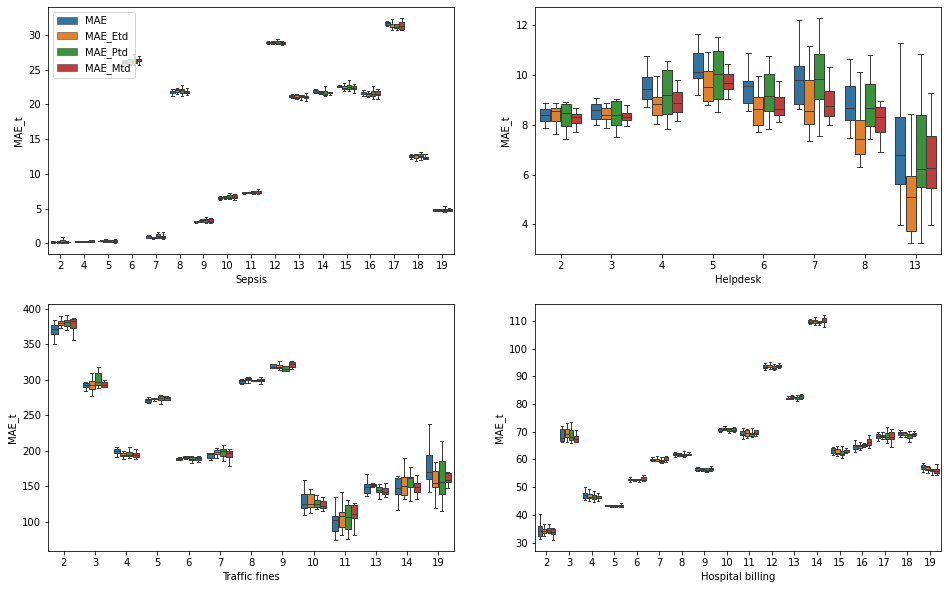

In [11]:
fig, ax = plt.subplots(2,2, figsize=(16, 10))

metric = "AE"
xaxis = "n_events"
hue = "loss_function"


hue_order = ['MAE','MAE_Etd', 'MAE_Ptd', 'MAE_Mtd']

# Exclude some results
results_table = inference_list

sepsis = results_table.loc[results_table.data == "sepsis"]

sns.boxplot(x=sepsis[xaxis], 
            y=sepsis[metric],
            hue=sepsis[hue],
            hue_order = hue_order,
            width=0.8,
            dodge=True,
            showfliers = False,
            linewidth=1,
            whis=1.5, 
            ax=ax[0,0])



helpdesk = results_table.loc[results_table.data == "helpdesk"]

sns.boxplot(x=helpdesk[xaxis], 
            y=helpdesk[metric],
            hue=helpdesk[hue],
            hue_order = hue_order,
            width=0.8,
            dodge=True,
            showfliers = False,
            linewidth=1,
            whis=1.5, 
            ax=ax[0,1])


traffic_fines = results_table.loc[results_table.data == "traffic_fines"]

sns.boxplot(x=traffic_fines[xaxis], 
            y=traffic_fines[metric],
            hue=traffic_fines[hue],
            hue_order = hue_order,
            width=0.8,
            dodge=True,
            showfliers = False,
            linewidth=1,
            whis=1.5, 
            ax=ax[1,0])

hospital_billing = results_table.loc[results_table.data == "hospital_billing"]

sns.boxplot(x=hospital_billing[xaxis], 
            y=hospital_billing[metric],
            hue=hospital_billing[hue],
            hue_order = hue_order,
            width=0.8,
            dodge=True,
            showfliers = False,
            linewidth=1,
            whis=1.5, 
            ax=ax[1,1])


ax[0,0].set(xlabel='Sepsis', ylabel='MAE_t')#, xlim=[-0.5,6])
ax[0,0].legend(loc='upper left')
ax[0,1].set(xlabel='Helpdesk', ylabel='MAE_t')#, xlim=[-0.5,6])
ax[0,1].legend([],[], frameon=False)
ax[1,0].set(xlabel='Traffic fines', ylabel='MAE_t')#, xlim=[-0.5,6])
ax[1,0].legend([],[], frameon=False)
ax[1,1].set(xlabel='Hospital billing', ylabel='MAE_t')#, xlim=[-0.5,6])
ax[1,1].legend([],[], frameon=False)

plt.savefig("accuracy_by_tracelength.png", dpi=200, bbox_inches = "tight")

fig.show()

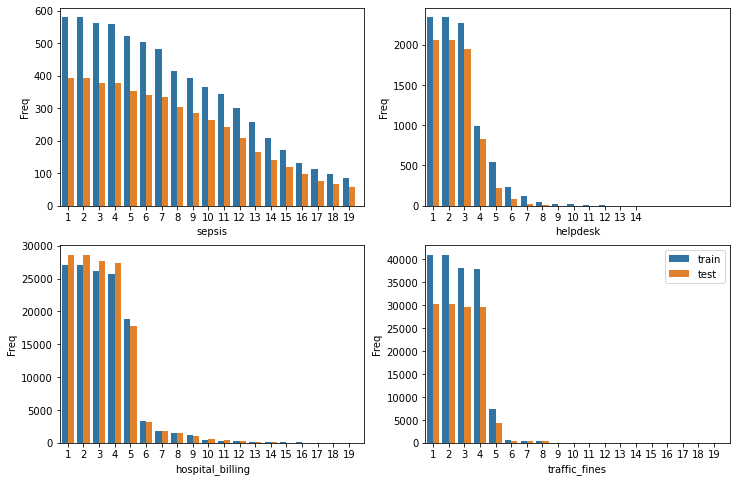